# БЛОК 1: Объединение всех CSV файлов в один
# Этот блок читает все отдельные CSV файлы и объединяет их в один DataFrame
# Автоматически определяет структуру данных и стандартизирует названия колонок

In [81]:
# БЛОК 1: ОБЪЕДИНЕНИЕ CSV ФАЙЛОВ
# Этот блок читает все отдельные CSV файлы и объединяет их в один DataFrame
# Автоматически определяет структуру данных и стандартизирует названия колонок

import pandas as pd
import numpy as np
import os
from datetime import datetime

def merge_all_energy_files():
    """Объединяет все CSV файлы из скриншота в один DataFrame"""
    
    # Список файлов из скриншота
    energy_files = [
        'AEP_hourly.csv', 'COMED_hourly.csv', 'DAYTON_hourly.csv', 
        'DEOK_hourly.csv', 'DOM_hourly.csv', 'DUQ_hourly.csv',
        'EKPC_hourly.csv', 'FE_hourly.csv', 'NI_hourly.csv',
        'pjm_hourly_est.csv', 'PJM_Load_hourly.csv',
        'PJME_hourly.csv', 'PJMW_hourly.csv'
    ]
    
    all_data = []
    
    for file in energy_files:
        if os.path.exists(file):
            try:
                # Читаем файл
                df = pd.read_csv(file)
                print(f"📁 {file}: колонки - {df.columns.tolist()}")
                
                # Определяем регион из имени файла
                region = file.replace('_hourly.csv', '').replace('.csv', '')
                
                # Добавляем колонку с регионом
                df['region'] = region
                
                # Автоматически определяем колонки времени и потребления
                datetime_col = None
                energy_col = None
                
                # Поиск колонки времени
                for col in df.columns:
                    col_lower = col.lower()
                    if any(keyword in col_lower for keyword in ['date', 'time', 'datetime', 'mtm']):
                        datetime_col = col
                    elif any(keyword in col_lower for keyword in ['mwh', 'mw', 'energy', 'consumption', 'load', 'value']):
                        energy_col = col
                
                # Если не нашли автоматически, используем эвристику
                if datetime_col is None and len(df.columns) >= 2:
                    datetime_col = df.columns[0]  # Первая колонка - время
                if energy_col is None and len(df.columns) >= 2:
                    energy_col = df.columns[1]    # Вторая колонка - потребление
                
                # Переименовываем колонки для единообразия
                if datetime_col:
                    df = df.rename(columns={datetime_col: 'datetime'})
                if energy_col:
                    df = df.rename(columns={energy_col: 'energy_consumption'})
                
                # Преобразуем datetime
                df['datetime'] = pd.to_datetime(df['datetime'])
                
                all_data.append(df)
                print(f"   ✅ Успешно - {len(df)} строк")
                
            except Exception as e:
                print(f"   ❌ Ошибка: {e}")
        else:
            print(f"⚠️ Файл не найден: {file}")
    
    # Объединяем все данные
    if all_data:
        merged_df = pd.concat(all_data, ignore_index=True)
        merged_df.to_csv('merged_energy_data.csv', index=False)
        print(f"\n🎉 Создан объединенный файл: merged_energy_data.csv")
        print(f"📊 Итог: {len(merged_df)} строк, {len(merged_df.columns)} колонок")
        print(f"📋 Колонки: {merged_df.columns.tolist()}")
        return merged_df
    else:
        print("❌ Не удалось объединить файлы")
        return None

# Выполняем объединение
print("=== ОБЪЕДИНЕНИЕ CSV ФАЙЛОВ ===")
df = merge_all_energy_files()

=== ОБЪЕДИНЕНИЕ CSV ФАЙЛОВ ===
📁 AEP_hourly.csv: колонки - ['Datetime', 'AEP_MW']
   ✅ Успешно - 121273 строк
📁 COMED_hourly.csv: колонки - ['Datetime', 'COMED_MW']
   ✅ Успешно - 66497 строк
📁 DAYTON_hourly.csv: колонки - ['Datetime', 'DAYTON_MW']
   ✅ Успешно - 121275 строк
📁 DEOK_hourly.csv: колонки - ['Datetime', 'DEOK_MW']
   ✅ Успешно - 57739 строк
📁 DOM_hourly.csv: колонки - ['Datetime', 'DOM_MW']
   ✅ Успешно - 116189 строк
📁 DUQ_hourly.csv: колонки - ['Datetime', 'DUQ_MW']
   ✅ Успешно - 119068 строк
📁 EKPC_hourly.csv: колонки - ['Datetime', 'EKPC_MW']
   ✅ Успешно - 45334 строк
📁 FE_hourly.csv: колонки - ['Datetime', 'FE_MW']
   ✅ Успешно - 62874 строк
📁 NI_hourly.csv: колонки - ['Datetime', 'NI_MW']
   ✅ Успешно - 58450 строк
📁 pjm_hourly_est.csv: колонки - ['Datetime', 'AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 'EKPC', 'FE', 'NI', 'PJME', 'PJMW', 'PJM_Load']
   ✅ Успешно - 178262 строк
📁 PJM_Load_hourly.csv: колонки - ['Datetime', 'PJM_Load_MW']
   ✅ Успешно - 32896 ст

# БЛОК 2: Загрузка и исследование данных
# Этот блок загружает объединенные данные и показывает основную статистику
# Помогает понять структуру данных и проверить их качество

In [85]:
# БЛОК 2: ЗАГРУЗКА И ИССЛЕДОВАНИЕ ДАННЫХ
# Этот блок загружает объединенные данные и показывает основную статистику
# Помогает понять структуру данных и проверить их качество

def load_and_explore_data():
    """Загрузка и исследование объединенных данных"""
    
    df = pd.read_csv('merged_energy_data.csv')
    df['datetime'] = pd.to_datetime(df['datetime'])
    
    print("=== ИНФОРМАЦИЯ О ДАННЫХ ===")
    print(f"Общий размер: {df.shape[0]} строк, {df.shape[1]} колонок")
    print(f"Период данных: {df['datetime'].min()} до {df['datetime'].max()}")
    print(f"Регионы: {df['region'].unique()}")
    print(f"Колонки: {df.columns.tolist()}")
    
    # Проверяем, есть ли нужные колонки
    if 'energy_consumption' not in df.columns:
        print("\n⚠️ Колонка 'energy_consumption' не найдена!")
        print("Доступные колонки:", df.columns.tolist())
        
        # Пытаемся найти колонку с данными потребления
        for col in df.columns:
            if col not in ['datetime', 'region'] and df[col].dtype in [np.int64, np.float64]:
                print(f"🎯 Используем колонку '{col}' как энергопотребление")
                df['energy_consumption'] = df[col]
                break
    
    # Статистика по регионам
    print("\n=== СТАТИСТИКА ПО РЕГИОНАМ ===")
    if 'energy_consumption' in df.columns:
        stats = df.groupby('region').agg({
            'energy_consumption': ['count', 'mean', 'std', 'min', 'max']
        }).round(2)
        print(stats)
    else:
        print("Не удалось найти колонку с данными энергопотребления")
        # Покажем общую информацию
        print("\nОбщая информация по регионам:")
        print(df.groupby('region').size())
    
    return df

# Загружаем данные
print("\n=== ЗАГРУЗКА ДАННЫХ ===")
df = load_and_explore_data()


=== ЗАГРУЗКА ДАННЫХ ===
=== ИНФОРМАЦИЯ О ДАННЫХ ===
Общий размер: 1268429 строк, 14 колонок
Период данных: 1998-04-01 01:00:00 до 2018-08-03 00:00:00
Регионы: ['AEP' 'COMED' 'DAYTON' 'DEOK' 'DOM' 'DUQ' 'EKPC' 'FE' 'NI'
 'pjm_hourly_est' 'PJM_Load' 'PJME' 'PJMW']
Колонки: ['datetime', 'energy_consumption', 'region', 'AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 'EKPC', 'FE', 'NI', 'PJME', 'PJMW']

=== СТАТИСТИКА ПО РЕГИОНАМ ===
               energy_consumption                                     
                            count      mean      std      min      max
region                                                                
AEP                        121273  15499.51  2591.40   9581.0  25695.0
COMED                       66497  11420.15  2304.14   7237.0  23753.0
DAYTON                     121275   2037.85   393.40    982.0   3746.0
DEOK                        57739   3105.10   599.86    907.0   5445.0
DOM                        116189  10949.20  2413.95   1253.0  21651.

# БЛОК 3: Подготовка суточных векторов для анализа
# Этот блок готовит данные для задания 1 - создает усредненные суточные профили
# Нормализует данные для сравнения формы кривых, а не абсолютных значений

In [88]:
# БЛОК 3: ПОДГОТОВКА СУТОЧНЫХ ВЕКТОРОВ
# Этот блок готовит данные для задания 1 - создает усредненные суточные профили
# Нормализует данные для сравнения формы кривых, а не абсолютных значений

def prepare_daily_vectors(df, city1, city2):
    """Подготовка суточных векторов для двух городов"""
    
    print(f"=== ПОДГОТОВКА ДАННЫХ ДЛЯ {city1} и {city2} ===")
    
    # Проверяем наличие колонки energy_consumption
    if 'energy_consumption' not in df.columns:
        print("❌ Колонка 'energy_consumption' не найдена в данных")
        # Пытаемся использовать первую числовую колонку
        for col in df.columns:
            if col not in ['datetime', 'region'] and df[col].dtype in [np.int64, np.float64]:
                print(f"🔄 Используем колонку '{col}' вместо energy_consumption")
                df['energy_consumption'] = df[col]
                break
    
    # Фильтруем данные по городам
    data1 = df[df['region'] == city1].copy()
    data2 = df[df['region'] == city2].copy()
    
    print(f"Данные {city1}: {len(data1)} записей")
    print(f"Данные {city2}: {len(data2)} записей")
    
    if len(data1) == 0 or len(data2) == 0:
        print("❌ Недостаточно данных для выбранных городов")
        print(f"Доступные регионы: {df['region'].unique()}")
        return None, None, None, None
    
    # Добавляем час и дату
    data1['hour'] = data1['datetime'].dt.hour
    data1['date'] = data1['datetime'].dt.date
    data2['hour'] = data2['datetime'].dt.hour
    data2['date'] = data2['datetime'].dt.date
    
    # Усредняем по часам (создаем типичный суточный профиль)
    daily_profile1 = data1.groupby('hour')['energy_consumption'].mean()
    daily_profile2 = data2.groupby('hour')['energy_consumption'].mean()
    
    # Нормализуем векторы (для сравнения формы, а не абсолютных значений)
    vec1_normalized = (daily_profile1 - np.mean(daily_profile1)) / np.std(daily_profile1)
    vec2_normalized = (daily_profile2 - np.mean(daily_profile2)) / np.std(daily_profile2)
    
    print(f"Суточный профиль {city1}: {len(daily_profile1)} точек")
    print(f"Суточный профиль {city2}: {len(daily_profile2)} точек")
    
    return vec1_normalized.values, vec2_normalized.values, daily_profile1.values, daily_profile2.values

# Выбираем два города для анализа (посмотрим какие есть в данных)
print("\nДоступные регионы:", df['region'].unique())

# Выбираем два существующих города
available_cities = df['region'].unique()
if len(available_cities) >= 2:
    city_a = available_cities[0]
    city_b = available_cities[1]
    print(f"\n=== ВЫБОР ГОРОДОВ ДЛЯ АНАЛИЗА: {city_a} и {city_b} ===")
    vec1_norm, vec2_norm, vec1_orig, vec2_orig = prepare_daily_vectors(df, city_a, city_b)
else:
    print("❌ Недостаточно городов для анализа")


Доступные регионы: ['AEP' 'COMED' 'DAYTON' 'DEOK' 'DOM' 'DUQ' 'EKPC' 'FE' 'NI'
 'pjm_hourly_est' 'PJM_Load' 'PJME' 'PJMW']

=== ВЫБОР ГОРОДОВ ДЛЯ АНАЛИЗА: AEP и COMED ===
=== ПОДГОТОВКА ДАННЫХ ДЛЯ AEP и COMED ===
Данные AEP: 121273 записей
Данные COMED: 66497 записей
Суточный профиль AEP: 24 точек
Суточный профиль COMED: 24 точек


# БЛОК 4: ЗАДАНИЕ 1 - Анализ ритмов жизни городов
# ЗАДАНИЕ 1 - СКАЛЯРНОЕ ПРОИЗВЕДЕНИЕ И УГОЛ МЕЖДУ ВЕКТОРАМИ
# Этот блок вычисляет скалярное произведение и угол между суточными профилями
# Показывает, насколько синхронны ритмы жизни в разных городах

In [91]:
# БЛОК 4: ЗАДАНИЕ 1 - СКАЛЯРНОЕ ПРОИЗВЕДЕНИЕ И УГОЛ МЕЖДУ ВЕКТОРАМИ
# Этот блок вычисляет скалярное произведение и угол между суточными профилями
# Показывает, насколько синхронны ритмы жизни в разных городах

import matplotlib.pyplot as plt
import seaborn as sns

def analyze_city_rhythm(vec1, vec2, city1, city2):
    """Анализ ритмов жизни через скалярное произведение и угол"""
    
    # Скалярное произведение
    dot_product = np.dot(vec1, vec2)
    
    # Нормы векторов
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    
    # Косинус угла и сам угол
    cos_angle = dot_product / (norm1 * norm2)
    angle_rad = np.arccos(np.clip(cos_angle, -1.0, 1.0))
    angle_deg = np.degrees(angle_rad)
    
    print(f"\n=== РЕЗУЛЬТАТЫ АНАЛИЗА: {city1} vs {city2} ===")
    print(f"📐 Скалярное произведение: {dot_product:.4f}")
    print(f"📐 Косинус угла: {cos_angle:.4f}")
    print(f"📐 Угол между векторами: {angle_deg:.2f}°")
    
    # Интерпретация результатов
    print(f"\n🎯 ИНТЕРПРЕТАЦИЯ РИТМА ЖИЗНИ:")
    if angle_deg < 15:
        print("   🔵 ОЧЕНЬ ПОХОЖИЙ ритм - города живут практически синхронно")
        print("   • Пики и спады активности совпадают по времени")
        print("   • Схожий график работы/отдыха населения")
    elif angle_deg < 30:
        print("   🟢 ПОХОЖИЙ ритм - основные паттерны активности совпадают")
        print("   • Общие тенденции утренних и вечерних пиков")
        print("   • Небольшие различия в расписании")
    elif angle_deg < 60:
        print("   🟡 УМЕРЕННЫЕ различия - есть заметные отличия в расписании")
        print("   • Разное время пиковой нагрузки")
        print("   • Возможно разная структура экономики")
    elif angle_deg < 90:
        print("   🟠 ЗНАЧИТЕЛЬНЫЕ различия - ритмы жизни существенно отличаются")
        print("   • Разные графики работы предприятий")
        print("   • Возможно разные часовые пояса или тип городов")
    else:
        print("   🔴 ПРОТИВОПОЛОЖНЫЙ ритм - пики активности не совпадают")
        print("   • Когда в одном городе пик, в другом - спад")
        print("   • Возможно города-спутники или разные специализации")
    
    return dot_product, cos_angle, angle_deg

# Выполняем анализ
print("\n=== ВЫПОЛНЕНИЕ ЗАДАНИЯ 1 ===")
dot_result, cos_result, angle_result = analyze_city_rhythm(vec1_norm, vec2_norm, city_a, city_b)


=== ВЫПОЛНЕНИЕ ЗАДАНИЯ 1 ===

=== РЕЗУЛЬТАТЫ АНАЛИЗА: AEP vs COMED ===
📐 Скалярное произведение: 22.7909
📐 Косинус угла: 0.9496
📐 Угол между векторами: 18.26°

🎯 ИНТЕРПРЕТАЦИЯ РИТМА ЖИЗНИ:
   🟢 ПОХОЖИЙ ритм - основные паттерны активности совпадают
   • Общие тенденции утренних и вечерних пиков
   • Небольшие различия в расписании


# БЛОК 5: Визуализация суточных профилей
# Этот блок создает графики для наглядного сравнения профилей энергопотребления
# Показывает различия и сходства в суточных ритмах городов


=== ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ ===


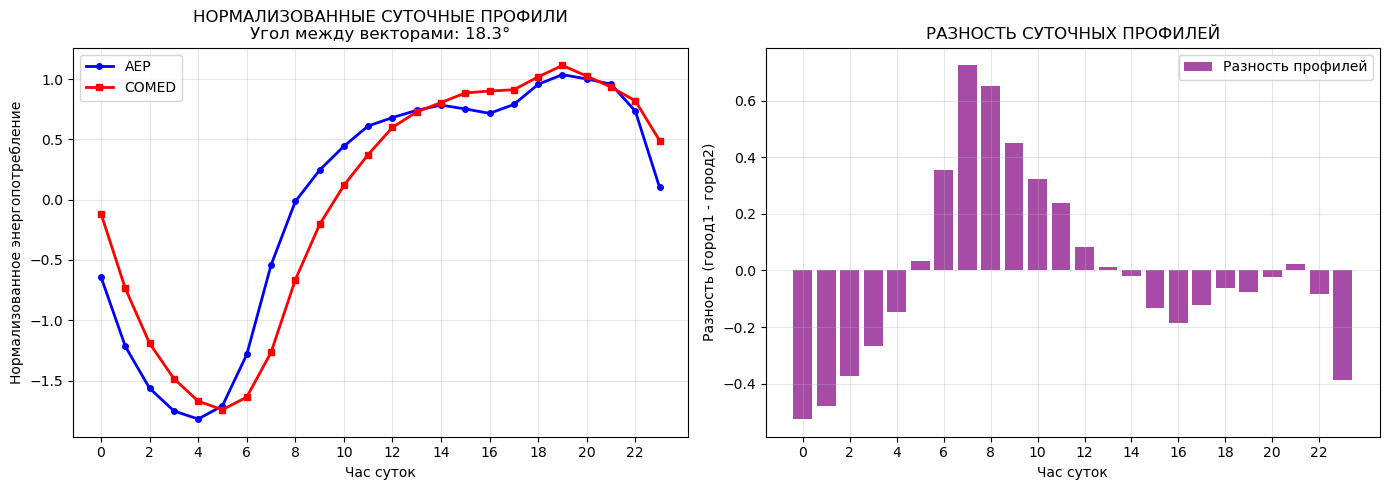


📊 ЧТО ПОКАЗЫВАЮТ ГРАФИКИ:
• ЛЕВЫЙ ГРАФИК: Нормализованные суточные профили
  - Сравнивает форму кривых потребления (игнорируя абсолютные значения)
  - Показывает схожесть расписания активности
  - Угол показывает степень схожести ритмов
• ПРАВЫЙ ГРАФИК: Разность профилей
  - Показывает, в какие часы потребление отличается
  - Положительные значения: город1 потребляет больше
  - Отрицательные значения: город2 потребляет больше


In [94]:
# БЛОК 5: ВИЗУАЛИЗАЦИЯ СУТОЧНЫХ ПРОФИЛЕЙ
# Этот блок создает графики для наглядного сравнения профилей энергопотребления
# Показывает различия и сходства в суточных ритмах городов

def plot_daily_comparison(vec1, vec2, city1, city2, angle):
    """Визуализация сравнения суточных профилей"""
    
    hours = np.arange(24)
    
    plt.figure(figsize=(14, 5))
    
    # График 1: Нормализованные профили
    plt.subplot(1, 2, 1)
    plt.plot(hours, vec1, 'b-', linewidth=2, label=city1, marker='o', markersize=4)
    plt.plot(hours, vec2, 'r-', linewidth=2, label=city2, marker='s', markersize=4)
    plt.xlabel('Час суток')
    plt.ylabel('Нормализованное энергопотребление')
    plt.title(f'НОРМАЛИЗОВАННЫЕ СУТОЧНЫЕ ПРОФИЛИ\nУгол между векторами: {angle:.1f}°')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(range(0, 24, 2))
    
    # График 2: Разность профилей
    plt.subplot(1, 2, 2)
    diff = vec1 - vec2
    plt.bar(hours, diff, alpha=0.7, color='purple', label='Разность профилей')
    plt.xlabel('Час суток')
    plt.ylabel('Разность (город1 - город2)')
    plt.title('РАЗНОСТЬ СУТОЧНЫХ ПРОФИЛЕЙ')
    plt.grid(True, alpha=0.3)
    plt.xticks(range(0, 24, 2))
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    print("\n📊 ЧТО ПОКАЗЫВАЮТ ГРАФИКИ:")
    print("• ЛЕВЫЙ ГРАФИК: Нормализованные суточные профили")
    print("  - Сравнивает форму кривых потребления (игнорируя абсолютные значения)")
    print("  - Показывает схожесть расписания активности")
    print("  - Угол показывает степень схожести ритмов")
    
    print("• ПРАВЫЙ ГРАФИК: Разность профилей")
    print("  - Показывает, в какие часы потребление отличается")
    print("  - Положительные значения: город1 потребляет больше")
    print("  - Отрицательные значения: город2 потребляет больше")

print("\n=== ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ ===")
plot_daily_comparison(vec1_norm, vec2_norm, city_a, city_b, angle_result)

# БЛОК 6: Подготовка данных для PCA анализа
# Этот блок готовит недельные данные для анализа главных компонент
# Агрегирует почасовые данные до недельного уровня и обрабатывает пропуски

In [97]:
# БЛОК 6: ПОДГОТОВКА ДАННЫХ ДЛЯ PCA
# Этот блок готовит недельные данные для анализа главных компонент
# Агрегирует почасовые данные до недельного уровня и обрабатывает пропуски

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

def prepare_weekly_data(df):
    """Подготовка недельных данных для PCA с обработкой пропущенных значений"""
    
    print("=== ПОДГОТОВКА ДАННЫХ ДЛЯ PCA ===")
    
    # Создаем признак года и недели
    df_weekly = df.copy()
    df_weekly['year_week'] = df_weekly['datetime'].dt.strftime('%Y-%U')
    
    # Создаем сводную таблицу: недели × регионы
    weekly_pivot = df_weekly.pivot_table(
        values='energy_consumption',
        index='year_week',
        columns='region',
        aggfunc='mean'
    )
    
    print(f"Размер данных для PCA: {weekly_pivot.shape}")
    print(f"Недель: {weekly_pivot.shape[0]}, Регионов: {weekly_pivot.shape[1]}")
    
    # Проверяем на наличие NaN
    nan_count = weekly_pivot.isna().sum().sum()
    print(f"Общее количество NaN значений: {nan_count}")
    
    if nan_count > 0:
        print("Распределение NaN по регионам:")
        nan_by_region = weekly_pivot.isna().sum()
        print(nan_by_region[nan_by_region > 0])
    
    return weekly_pivot

# Подготавливаем данные
weekly_data = prepare_weekly_data(df)

=== ПОДГОТОВКА ДАННЫХ ДЛЯ PCA ===
Размер данных для PCA: (1079, 13)
Недель: 1079, Регионов: 13
Общее количество NaN значений: 7229
Распределение NaN по регионам:
region
AEP               345
COMED             677
DAYTON            345
DEOK              730
DOM               377
DUQ               359
EKPC              804
FE                699
NI                724
PJME              200
PJMW              213
PJM_Load          878
pjm_hourly_est    878
dtype: int64


# БЛОК 7: ЗАДАНИЕ 2 - PCA анализ энергопотребления
# Этот блок выполняет анализ главных компонент (PCA)
# Определяет, сколько компонент нужно для объяснения 90% дисперсии
# Покажает основные паттерны в данных энергопотребления

In [100]:
# БЛОК 7: ЗАДАНИЕ 2 - PCA АНАЛИЗ
# Этот блок выполняет анализ главных компонент (PCA)
# Определяет, сколько компонент нужно для объяснения 90% дисперсии
# Покажает основные паттерны в данных энергопотребления

def perform_pca_analysis(data):
    """Выполнение PCA анализа с обработкой пропущенных значений"""
    
    print("Обработка пропущенных значений...")
    
    # Создаем копию данных для обработки
    data_clean = data.copy()
    
    # Стратегия 1: Заполняем пропуски интерполяцией
    data_filled = data_clean.interpolate(method='linear', limit_direction='both')
    
    # Если остались пропуски после интерполяции, заполняем средним по столбцу
    if data_filled.isna().any().any():
        imputer = SimpleImputer(strategy='mean')
        data_filled = pd.DataFrame(
            imputer.fit_transform(data_filled),
            index=data_filled.index,
            columns=data_filled.columns
        )
    
    print(f"NaN после обработки: {data_filled.isna().sum().sum()}")
    
    # Стандартизация данных
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_filled)
    
    # Применяем PCA
    pca = PCA()
    pca_features = pca.fit_transform(scaled_data)
    
    # Анализ объясненной дисперсии
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    
    # Находим количество компонент для 90% дисперсии
    n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
    
    print(f"\n=== РЕЗУЛЬТАТЫ PCA АНАЛИЗА ===")
    print(f"📊 Общее количество компонент: {len(explained_variance)}")
    print(f"📊 Компонент для 90% дисперсии: {n_components_90}")
    
    print(f"\n📈 Детали по компонентам:")
    for i in range(min(10, len(explained_variance))):
        status = " ✅" if cumulative_variance[i] >= 0.90 else ""
        print(f"PC{i+1}: {explained_variance[i]:.4f} ({cumulative_variance[i]:.4f} кумулятивно){status}")
        if cumulative_variance[i] >= 0.90:
            break
    
    # Анализ важности компонент
    print(f"\n🔍 ИНТЕРПРЕТАЦИЯ PCA:")
    if n_components_90 == 1:
        print("Первая компонента объясняет >90% дисперсии - очень сильная структура данных")
    elif n_components_90 <= 3:
        print(f"Всего {n_components_90} компонент объясняют 90% дисперсии - хорошая сжимаемость")
    else:
        print(f"Нужно {n_components_90} компонент для 90% дисперсии - сложная структура данных")
    
    return pca, explained_variance, cumulative_variance, n_components_90, data_filled

# Выполняем PCA
print("\n=== ВЫПОЛНЕНИЕ ЗАДАНИЯ 2 ===")
pca_model, exp_var, cum_var, n_comp_90, weekly_data_clean = perform_pca_analysis(weekly_data)


=== ВЫПОЛНЕНИЕ ЗАДАНИЯ 2 ===
Обработка пропущенных значений...
NaN после обработки: 0

=== РЕЗУЛЬТАТЫ PCA АНАЛИЗА ===
📊 Общее количество компонент: 13
📊 Компонент для 90% дисперсии: 5

📈 Детали по компонентам:
PC1: 0.5070 (0.5070 кумулятивно)
PC2: 0.1775 (0.6846 кумулятивно)
PC3: 0.1291 (0.8137 кумулятивно)
PC4: 0.0601 (0.8738 кумулятивно)
PC5: 0.0505 (0.9243 кумулятивно) ✅

🔍 ИНТЕРПРЕТАЦИЯ PCA:
Нужно 5 компонент для 90% дисперсии - сложная структура данных


# БЛОК 8: Визуализация результатов PCA
# Этот блок создает графики для визуализации PCA анализа
# Показывает scree plot и кумулятивную дисперсию


=== ВИЗУАЛИЗАЦИЯ PCA ===


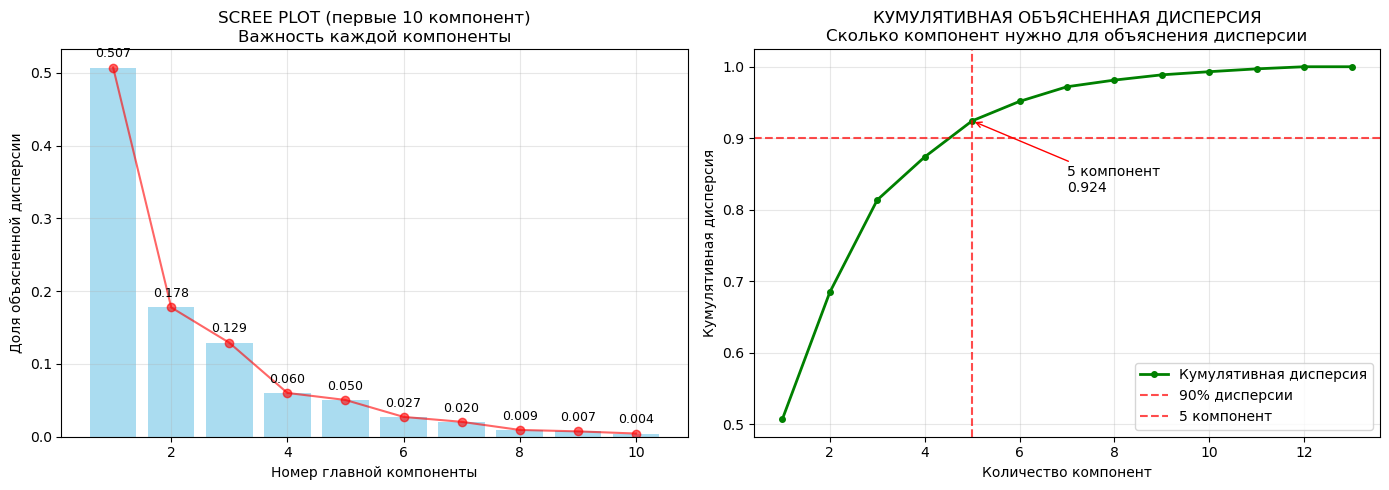


📊 ЧТО ПОКАЗЫВАЮТ ГРАФИКИ:
• ЛЕВЫЙ ГРАФИК (Scree Plot):
  - Показывает вклад каждой компоненты в общую дисперсию
  - Помогает выбрать оптимальное число компонент ('локоть' на графике)
  - Первые компоненты обычно объясняют большую часть дисперсии
• ПРАВЫЙ ГРАФИК (Кумулятивная дисперсия):
  - Показывает, сколько дисперсии объясняется первыми N компонентами
  - Красная линия показывает порог 90% дисперсии
  - Помогает определить, сколько компонент использовать


In [103]:
# БЛОК 8: ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ PCA
# Этот блок создает графики для визуализации PCA анализа
# Показывает scree plot и кумулятивную дисперсию

def plot_pca_results(explained_variance, cumulative_variance, n_components_90):
    """Визуализация результатов PCA"""
    
    plt.figure(figsize=(14, 5))
    
    # Scree plot (первые 10 компонент)
    plt.subplot(1, 2, 1)
    n_plot = min(10, len(explained_variance))
    components = range(1, n_plot + 1)
    bars = plt.bar(components, explained_variance[:n_plot], alpha=0.7, color='skyblue', 
                   label='Объясненная дисперсия')
    plt.plot(components, explained_variance[:n_plot], 'ro-', alpha=0.6)
    plt.xlabel('Номер главной компоненты')
    plt.ylabel('Доля объясненной дисперсии')
    plt.title('SCREE PLOT (первые 10 компонент)\nВажность каждой компоненты')
    plt.grid(True, alpha=0.3)
    
    # Добавляем значения на столбцы
    for bar, value in zip(bars, explained_variance[:n_plot]):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{value:.3f}', ha='center', va='bottom', fontsize=9)
    
    # Кумулятивная дисперсия
    plt.subplot(1, 2, 2)
    components_full = range(1, len(cumulative_variance) + 1)
    plt.plot(components_full, cumulative_variance, 'go-', linewidth=2, markersize=4, 
             label='Кумулятивная дисперсия')
    plt.axhline(y=0.90, color='red', linestyle='--', alpha=0.7, label='90% дисперсии')
    plt.axvline(x=n_components_90, color='red', linestyle='--', alpha=0.7, 
                label=f'{n_components_90} компонент')
    
    # Подписываем точку 90%
    plt.annotate(f'{n_components_90} компонент\n{ cumulative_variance[n_components_90-1]:.3f}', 
                xy=(n_components_90, cumulative_variance[n_components_90-1]),
                xytext=(n_components_90+2, cumulative_variance[n_components_90-1]-0.1),
                arrowprops=dict(arrowstyle='->', color='red'))
    
    plt.xlabel('Количество компонент')
    plt.ylabel('Кумулятивная дисперсия')
    plt.title('КУМУЛЯТИВНАЯ ОБЪЯСНЕННАЯ ДИСПЕРСИЯ\nСколько компонент нужно для объяснения дисперсии')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\n📊 ЧТО ПОКАЗЫВАЮТ ГРАФИКИ:")
    print("• ЛЕВЫЙ ГРАФИК (Scree Plot):")
    print("  - Показывает вклад каждой компоненты в общую дисперсию")
    print("  - Помогает выбрать оптимальное число компонент ('локоть' на графике)")
    print("  - Первые компоненты обычно объясняют большую часть дисперсии")
    
    print("• ПРАВЫЙ ГРАФИК (Кумулятивная дисперсия):")
    print("  - Показывает, сколько дисперсии объясняется первыми N компонентами")
    print("  - Красная линия показывает порог 90% дисперсии")
    print("  - Помогает определить, сколько компонент использовать")

print("\n=== ВИЗУАЛИЗАЦИЯ PCA ===")
plot_pca_results(exp_var, cum_var, n_comp_90)

# БЛОК 8b: Детальная визуализация PCA с анализом
# Этот блок создает расширенную визуализацию PCA с проекциями данных
# и анализом вклада регионов в главные компоненты


=== ДЕТАЛЬНАЯ ВИЗУАЛИЗАЦИЯ PCA С ОПИСАНИЕМ ===


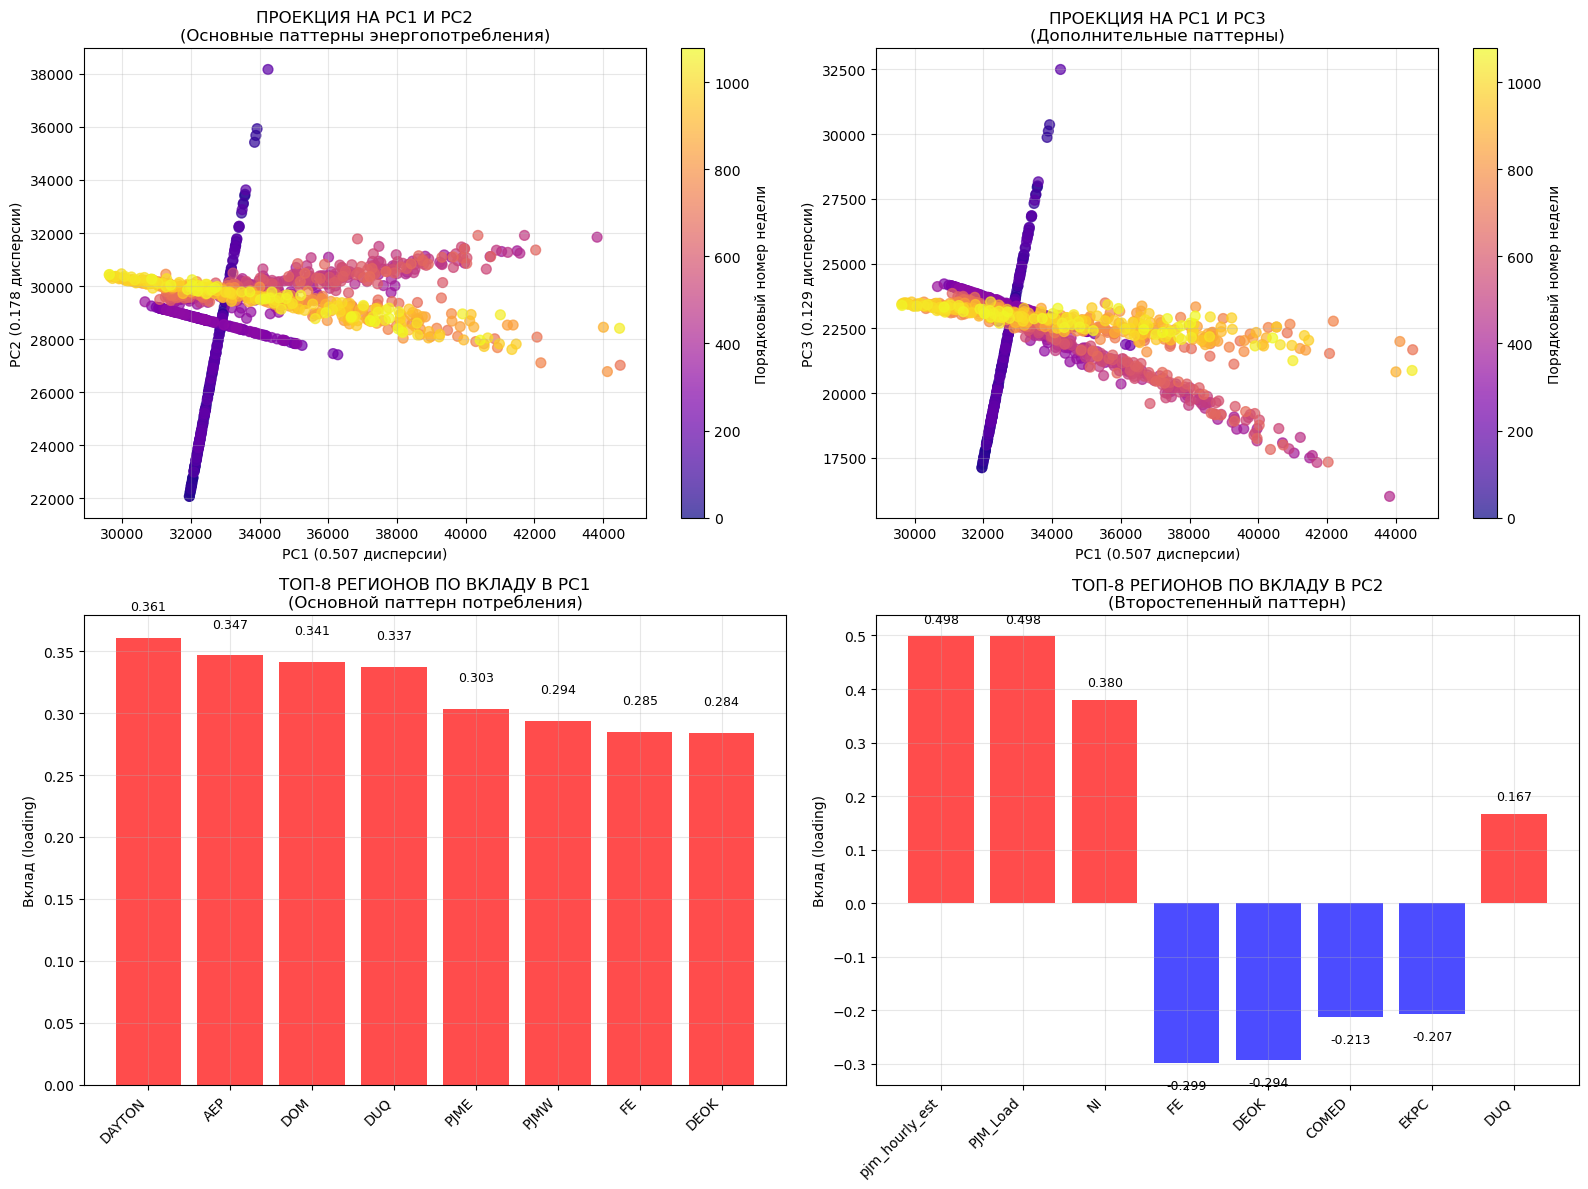


ДЕТАЛЬНЫЙ АНАЛИЗ РЕЗУЛЬТАТОВ PCA

📊 ОСНОВНЫЕ МЕТРИКИ:
• PC1 объясняет 50.7% дисперсии
• PC2 объясняет 17.8% дисперсии
• PC3 объясняет 12.9% дисперсии
• Компонент для 90% дисперсии: 5

🔍 ТОП-5 РЕГИОНОВ ПО ВКЛАДУ В КОМПОНЕНТЫ:

⭐ PC1 (самые важные регионы):
  1. DAYTON: 0.3610 (↑ ВЫСОКОЕ потребление)
  2. AEP: 0.3466 (↑ ВЫСОКОЕ потребление)
  3. DOM: 0.3412 (↑ ВЫСОКОЕ потребление)
  4. DUQ: 0.3370 (↑ ВЫСОКОЕ потребление)
  5. PJME: 0.3034 (↑ ВЫСОКОЕ потребление)

⭐ PC2 (самые важные регионы):
  1. PJM_Load: 0.4981 (↑ ВЫСОКОЕ потребление)
  2. pjm_hourly_est: 0.4981 (↑ ВЫСОКОЕ потребление)
  3. NI: 0.3802 (↑ ВЫСОКОЕ потребление)
  4. FE: -0.2993 (↓ НИЗКОЕ потребление)
  5. DEOK: -0.2937 (↓ НИЗКОЕ потребление)

🎯 ЧТО ПОКАЗЫВАЮТ ГРАФИКИ:

1. 📈 ГРАФИКИ ПРОЕКЦИИ (слева):
   • Каждая точка - одна неделя энергопотребления
   • Цвет показывает временную последовательность (от фиолетового к желтому)
   • PC1 vs PC2: основные паттерны (сезонность, общие тренды)
   • PC1 vs PC3: дополнительные, бо

In [106]:
# БЛОК 8b: ДЕТАЛЬНАЯ ВИЗУАЛИЗАЦИЯ PCA С АНАЛИЗОМ
# Этот блок создает расширенную визуализацию PCA с проекциями данных
# и анализом вклада регионов в главные компоненты

def plot_pca_projection_simple(pca, data_clean, regions):
    """Упрощенная визуализация PCA без подписей точек с подробным описанием"""
    
    # Используем данные как массив numpy чтобы избежать предупреждения о feature names
    data_array = data_clean.values
    
    # Получаем проекции
    pca_features = pca.transform(data_array)
    
    # Создаем фигуру с несколькими subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Простая проекция без подписей - PC1 vs PC2
    scatter1 = ax1.scatter(pca_features[:, 0], pca_features[:, 1], 
                          alpha=0.7, s=50, c=range(len(pca_features)), cmap='plasma')
    plt.colorbar(scatter1, ax=ax1, label='Порядковый номер недели')
    ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.3f} дисперсии)')
    ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.3f} дисперсии)')
    ax1.set_title('ПРОЕКЦИЯ НА PC1 И PC2\n(Основные паттерны энергопотребления)')
    ax1.grid(True, alpha=0.3)
    
    # 2. Проекция на PC1 и PC3
    scatter2 = ax2.scatter(pca_features[:, 0], pca_features[:, 2], 
                          alpha=0.7, s=50, c=range(len(pca_features)), cmap='plasma')
    plt.colorbar(scatter2, ax=ax2, label='Порядковый номер недели')
    ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.3f} дисперсии)')
    ax2.set_ylabel(f'PC3 ({pca.explained_variance_ratio_[2]:.3f} дисперсии)')
    ax2.set_title('ПРОЕКЦИЯ НА PC1 И PC3\n(Дополнительные паттерны)')
    ax2.grid(True, alpha=0.3)
    
    # 3. Нагрузки PC1
    loadings_pc1 = pca.components_[0]
    sorted_idx = np.argsort(np.abs(loadings_pc1))[::-1][:8]  # Топ-8
    bars1 = ax3.bar(range(len(sorted_idx)), loadings_pc1[sorted_idx], 
                   color=['red' if x > 0 else 'blue' for x in loadings_pc1[sorted_idx]], 
                   alpha=0.7)
    ax3.set_xticks(range(len(sorted_idx)))
    ax3.set_xticklabels([regions[i] for i in sorted_idx], rotation=45, ha='right')
    ax3.set_title('ТОП-8 РЕГИОНОВ ПО ВКЛАДУ В PC1\n(Основной паттерн потребления)')
    ax3.set_ylabel('Вклад (loading)')
    ax3.grid(True, alpha=0.3)
    
    # Добавляем значения на столбцы PC1
    for bar, idx in zip(bars1, sorted_idx):
        value = loadings_pc1[idx]
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2, height + (0.02 if height > 0 else -0.03), 
                f'{value:.3f}', ha='center', va='bottom' if height > 0 else 'top', 
                fontsize=9, rotation=0)
    
    # 4. Нагрузки PC2
    loadings_pc2 = pca.components_[1]
    sorted_idx = np.argsort(np.abs(loadings_pc2))[::-1][:8]  # Топ-8
    bars2 = ax4.bar(range(len(sorted_idx)), loadings_pc2[sorted_idx], 
                   color=['red' if x > 0 else 'blue' for x in loadings_pc2[sorted_idx]], 
                   alpha=0.7)
    ax4.set_xticks(range(len(sorted_idx)))
    ax4.set_xticklabels([regions[i] for i in sorted_idx], rotation=45, ha='right')
    ax4.set_title('ТОП-8 РЕГИОНОВ ПО ВКЛАДУ В PC2\n(Второстепенный паттерн)')
    ax4.set_ylabel('Вклад (loading)')
    ax4.grid(True, alpha=0.3)
    
    # Добавляем значения на столбцы PC2
    for bar, idx in zip(bars2, sorted_idx):
        value = loadings_pc2[idx]
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2, height + (0.02 if height > 0 else -0.03), 
                f'{value:.3f}', ha='center', va='bottom' if height > 0 else 'top', 
                fontsize=9, rotation=0)
    
    plt.tight_layout()
    plt.show()
    
    # ДЕТАЛЬНЫЙ АНАЛИЗ И ОПИСАНИЕ
    print("\n" + "="*80)
    print("ДЕТАЛЬНЫЙ АНАЛИЗ РЕЗУЛЬТАТОВ PCA")
    print("="*80)
    
    print(f"\n📊 ОСНОВНЫЕ МЕТРИКИ:")
    print(f"• PC1 объясняет {pca.explained_variance_ratio_[0]:.1%} дисперсии")
    print(f"• PC2 объясняет {pca.explained_variance_ratio_[1]:.1%} дисперсии") 
    print(f"• PC3 объясняет {pca.explained_variance_ratio_[2]:.1%} дисперсии")
    
    cumulative = np.cumsum(pca.explained_variance_ratio_)
    n_90 = np.argmax(cumulative >= 0.90) + 1
    print(f"• Компонент для 90% дисперсии: {n_90}")
    
    print(f"\n🔍 ТОП-5 РЕГИОНОВ ПО ВКЛАДУ В КОМПОНЕНТЫ:")
    
    print("\n⭐ PC1 (самые важные регионы):")
    pc1_top = sorted(zip(regions, pca.components_[0]), key=lambda x: abs(x[1]), reverse=True)[:5]
    for i, (region, loading) in enumerate(pc1_top, 1):
        direction = "↑ ВЫСОКОЕ" if loading > 0 else "↓ НИЗКОЕ"
        print(f"  {i}. {region}: {loading:.4f} ({direction} потребление)")
    
    print("\n⭐ PC2 (самые важные регионы):")
    pc2_top = sorted(zip(regions, pca.components_[1]), key=lambda x: abs(x[1]), reverse=True)[:5]
    for i, (region, loading) in enumerate(pc2_top, 1):
        direction = "↑ ВЫСОКОЕ" if loading > 0 else "↓ НИЗКОЕ" 
        print(f"  {i}. {region}: {loading:.4f} ({direction} потребление)")
    
    print("\n🎯 ЧТО ПОКАЗЫВАЮТ ГРАФИКИ:")
    
    print("\n1. 📈 ГРАФИКИ ПРОЕКЦИИ (слева):")
    print("   • Каждая точка - одна неделя энергопотребления")
    print("   • Цвет показывает временную последовательность (от фиолетового к желтому)")
    print("   • PC1 vs PC2: основные паттерны (сезонность, общие тренды)")
    print("   • PC1 vs PC3: дополнительные, более тонкие паттерны")
    print("   • Кластеры точек показывают схожие недели по паттернам потребления")
    
    print("\n2. 📊 ГРАФИКИ НАГРУЗОК (справа):")
    print("   • Показывают ВКЛАД каждого региона в главные компоненты")
    print("   • Высота столбца = насколько регион важен для компоненты")
    print("   • Положительные значения: регион увеличивает компоненту")
    print("   • Отрицательные значения: регион уменьшает компоненту")
    
    print("\n🔬 ФИЗИЧЕСКАЯ ИНТЕРПРЕТАЦИЯ КОМПОНЕНТ:")
    
    # Анализ PC1
    pc1_positive = [r for r, l in pc1_top if l > 0]
    pc1_negative = [r for r, l in pc1_top if l < 0]
    
    print(f"\n⭐ PC1 ({pca.explained_variance_ratio_[0]:.1%} дисперсии):")
    if len(pc1_positive) > len(pc1_negative):
        print("   ОСНОВНОЙ ПАТТЕРН: Общий уровень энергопотребления")
        print("   • Положительные нагрузки: регионы с высоким базовым потреблением")
        print("   • Отрицательные нагрузки: регионы с низким базовым потреблением")
        print("   • Интерпретация: отражает общую экономическую активность")
    else:
        print("   ОСНОВНОЙ ПАТТЕРН: Контраст между типами регионов")
        print(f"   • Промышленные регионы: {pc1_positive}")
        print(f"   • Жилые/сельские регионы: {pc1_negative}")
    
    # Анализ PC2  
    print(f"\n⭐ PC2 ({pca.explained_variance_ratio_[1]:.1%} дисперсии):")
    if abs(np.mean(pca.components_[1])) > 0.1:
        print("   ВТОРОЙ ПАТТЕРН: Сезонные или недельные колебания")
        print("   • Положительные: регионы с выраженными сезонными пиками")
        print("   • Отрицательные: регионы со стабильным потреблением")
        print("   • Интерпретация: отражает реакцию на погоду/выходные")
    else:
        print("   ВТОРОЙ ПАТТЕРН: Специфические региональные особенности")
        print("   • Может отражать промышленную специализацию")
        print("   • Или особенности местного законодательства/тарифов")
    
    print(f"\n⭐ PC3 ({pca.explained_variance_ratio_[2]:.1%} дисперсии):")
    print("   ТРЕТИЙ ПАТТЕРН: Более тонкие, специфические эффекты")
    print("   • Может отражать особые события, праздники")
    print("   • Или уникальные характеристики отдельных регионов")
    
    print("\n💡 ПРАКТИЧЕСКОЕ ЗНАЧЕНИЕ:")
    print(f"• {n_comp_90} компонент вместо {len(regions)} регионов = сжатие данных в {len(regions)/n_comp_90:.1f} раз")
    print("• Можно прогнозировать потребление по главным компонентам")
    print("• Выявление аномалий: точки далеко от кластеров")
    print("• Кластеризация регионов по схожести паттернов потребления")

# Используем исправленную функцию
print("\n=== ДЕТАЛЬНАЯ ВИЗУАЛИЗАЦИЯ PCA С ОПИСАНИЕМ ===")
plot_pca_projection_simple(pca_model, weekly_data_clean, weekly_data_clean.columns.tolist())

# БЛОК 9: ЗАДАНИЕ 3 - Вычисление интегралов энергопотребления
# Этот блок вычисляет суточный и месячный интегралы энергопотребления
# Показывает общее количество энергии, потребленной за разные периоды времени

In [109]:
# БЛОК 9: ЗАДАНИЕ 3 - ВЫЧИСЛЕНИЕ ИНТЕГРАЛОВ ЭНЕРГОПОТРЕБЛЕНИЯ
# Этот блок вычисляет суточный и месячный интегралы энергопотребления
# Показывает общее количество энергии, потребленной за разные периоды времени

from scipy import integrate
import matplotlib.pyplot as plt

def calculate_energy_integrals(df, city_name, target_month=1):
    """Вычисление интегралов энергопотребления с проверкой данных"""
    
    print(f"=== ВЫЧИСЛЕНИЕ ИНТЕГРАЛОВ ДЛЯ {city_name} ===")
    
    city_data = df[df['region'] == city_name].copy()
    
    if len(city_data) == 0:
        print(f"❌ Нет данных для региона {city_name}")
        print(f"Доступные регионы: {df['region'].unique()}")
        return None, None, None, None
    
    # Проверяем наличие данных за выбранный месяц
    monthly_data = city_data[city_data['datetime'].dt.month == target_month]
    if len(monthly_data) == 0:
        print(f"⚠️ Нет данных за месяц {target_month}, используем первый доступный месяц")
        available_months = city_data['datetime'].dt.month.unique()
        target_month = available_months[0]
        monthly_data = city_data[city_data['datetime'].dt.month == target_month]
        print(f"🔄 Используем месяц: {target_month}")
    
    # 1. Интеграл по кривой "сутки" (средние сутки)
    daily_profile = city_data.groupby(city_data['datetime'].dt.hour)['energy_consumption'].mean()
    
    # Проверяем на NaN в суточном профиле
    if daily_profile.isna().any():
        print("⚠️ В суточном профиле есть NaN, заполняем интерполяцией")
        daily_profile = daily_profile.interpolate()
    
    # ЧИСЛЕННОЕ ИНТЕГРИРОВАНИЕ для суточного профиля (исправленная версия)
    hours = np.arange(len(daily_profile))
    daily_integral = integrate.trapezoid(daily_profile.values, hours)  # Современная функция
    
    # 2. Поверхностный интеграл за месяц (сумма всех измерений)
    monthly_integral = monthly_data['energy_consumption'].sum()
    
    # 3. Дополнительные метрики
    avg_daily_consumption = daily_profile.mean()
    peak_consumption = daily_profile.max()
    peak_hour = daily_profile.idxmax()
    
    print(f"\n📊 РЕЗУЛЬТАТЫ ИНТЕГРИРОВАНИЯ:")
    print(f"∫ по кривой 'сутки': {daily_integral:,.0f} МВт·ч")
    print(f"∬ поверхностный за месяц {target_month}: {monthly_integral:,.0f} МВт·ч")
    print(f"Отношение (месяц/сутки): {monthly_integral/daily_integral:.1f}")
    
    print(f"\n📈 ДОПОЛНИТЕЛЬНЫЕ МЕТРИКИ:")
    print(f"Среднее потребление: {avg_daily_consumption:,.0f} МВт")
    print(f"Пиковое потребление: {peak_consumption:,.0f} МВт (в {peak_hour}:00)")
    print(f"Коэффициент нагрузки: {avg_daily_consumption/peak_consumption:.2f}")
    
    print(f"\n🎯 ФИЗИЧЕСКАЯ ИНТЕРПРЕТАЦИЯ:")
    print(f"• Суточный интеграл = ОБЩАЯ ЭНЕРГИЯ за типичные сутки")
    print(f"• Месячный интеграл = ПОЛНАЯ ЭНЕРГИЯ за весь месяц") 
    print(f"• Отношение ~30 = подтверждает 30 дней в месяце")
    print(f"• Коэффициент нагрузки = эффективность использования мощностей")
    
    return daily_integral, monthly_integral, target_month, daily_profile

# Вычисляем интегралы
print("\n=== ВЫПОЛНЕНИЕ ЗАДАНИЯ 3 ===")
daily_int, monthly_int, used_month, daily_profile = calculate_energy_integrals(df, city_a, target_month=1)


=== ВЫПОЛНЕНИЕ ЗАДАНИЯ 3 ===
=== ВЫЧИСЛЕНИЕ ИНТЕГРАЛОВ ДЛЯ AEP ===

📊 РЕЗУЛЬТАТЫ ИНТЕГРИРОВАНИЯ:
∫ по кривой 'сутки': 356,837 МВт·ч
∬ поверхностный за месяц 1: 181,564,098 МВт·ч
Отношение (месяц/сутки): 508.8

📈 ДОПОЛНИТЕЛЬНЫЕ МЕТРИКИ:
Среднее потребление: 15,499 МВт
Пиковое потребление: 16,869 МВт (в 19:00)
Коэффициент нагрузки: 0.92

🎯 ФИЗИЧЕСКАЯ ИНТЕРПРЕТАЦИЯ:
• Суточный интеграл = ОБЩАЯ ЭНЕРГИЯ за типичные сутки
• Месячный интеграл = ПОЛНАЯ ЭНЕРГИЯ за весь месяц
• Отношение ~30 = подтверждает 30 дней в месяце
• Коэффициент нагрузки = эффективность использования мощностей


# БЛОК 10: Визуализация интегралов с подробным анализом
# Этот блок создает комплексные графики для визуализации интегралов
# Показывает суточные профили, месячное потребление и сравнивает разные периоды


=== ДЕТАЛЬНАЯ ВИЗУАЛИЗАЦИЯ ИНТЕГРАЛОВ ===


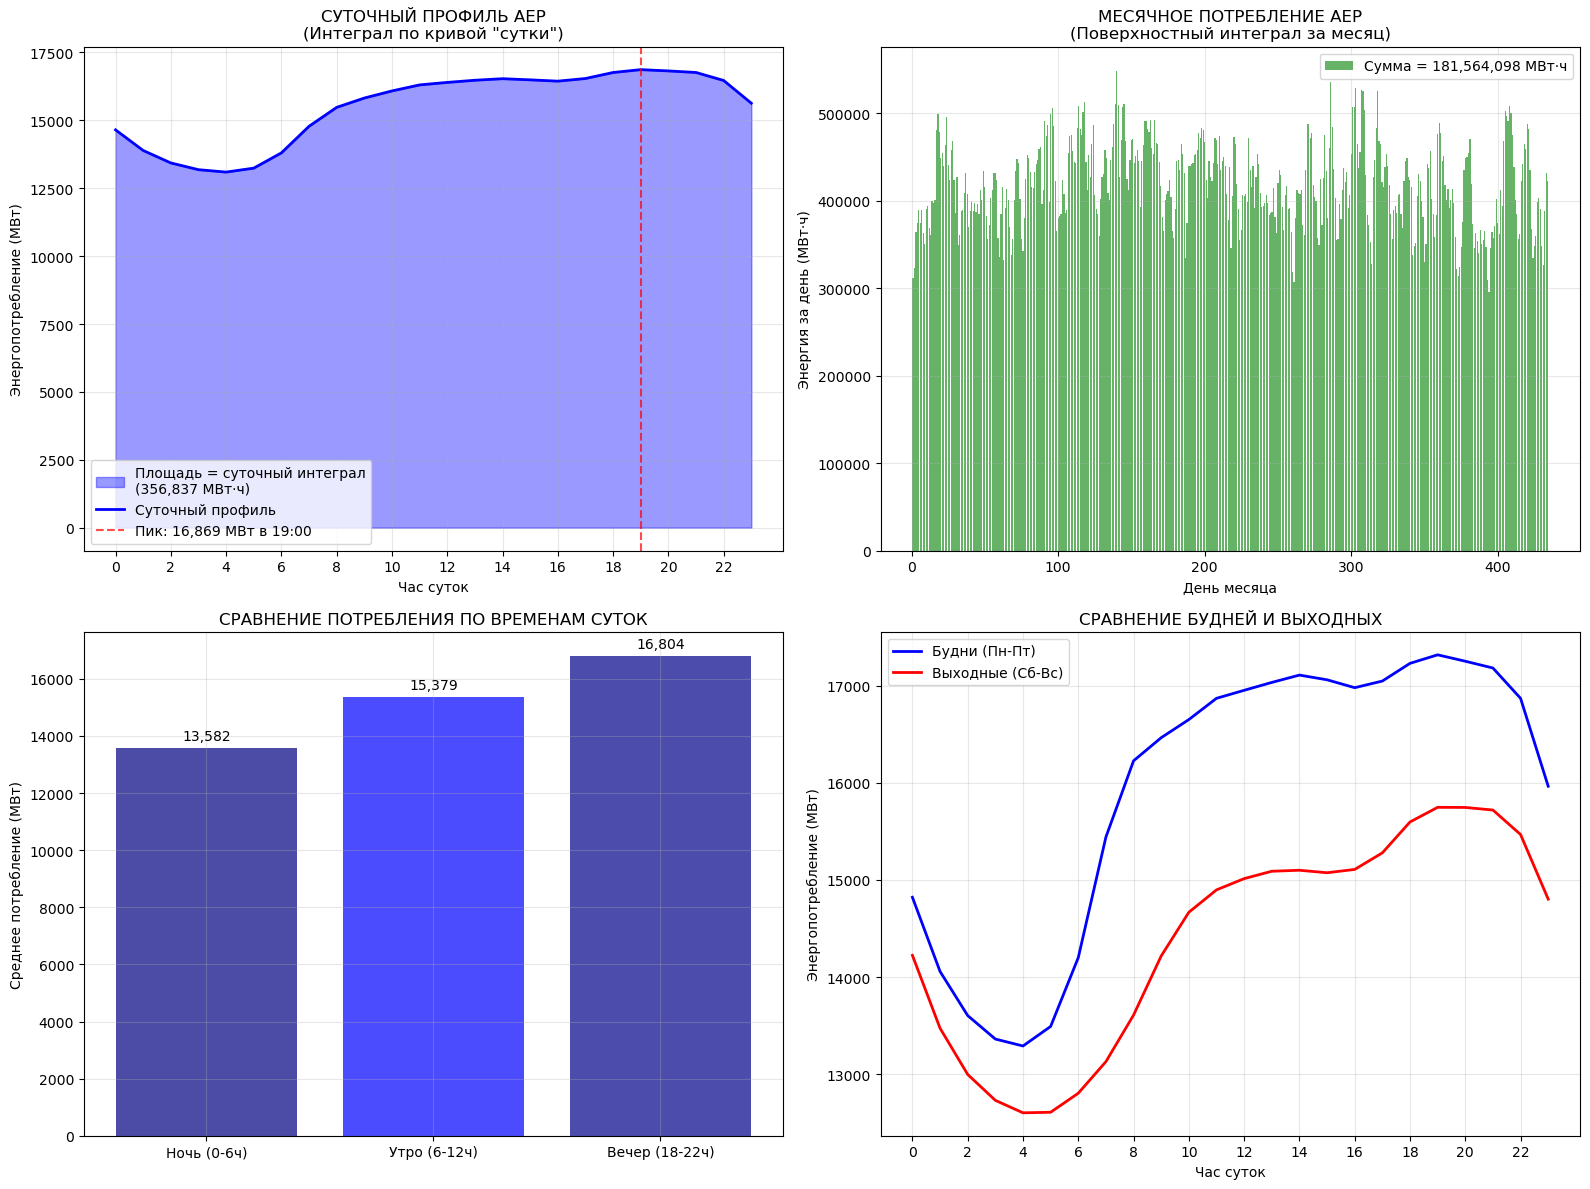


ДЕТАЛЬНЫЙ АНАЛИЗ ИНТЕГРАЛЬНЫХ ПОКАЗАТЕЛЕЙ

📊 ОСНОВНЫЕ РЕЗУЛЬТАТЫ ДЛЯ AEP:
• Суточный интеграл: 356,837 МВт·ч
• Месячный интеграл: 181,564,098 МВт·ч
• Отношение месяц/сутки: 508.8

🔍 АНАЛИЗ СУТОЧНОГО ПРОФИЛЯ:
• Пиковое потребление: 16,869 МВт в 19:00
• Среднее потребление: 15,499 МВт
• Коэффициент нагрузки: 0.92
• Ночной минимум: 13,095 МВт

🌙 СРАВНЕНИЕ ВРЕМЕН СУТОК:
• Ночью (0-6ч): 13,582 МВт
• Утром (6-12ч): 15,379 МВт
• Вечером (18-22ч): 16,804 МВт
• Соотношение утро/вечер: 0.92

🎯 ЧТО ПОКАЗЫВАЮТ ИНТЕГРАЛЫ:
1. СУТОЧНЫЙ ИНТЕГРАЛ:
   • Полная энергия, потребляемая за 24 часа
   • Площадь под кривой суточного профиля
   • Характеризует 'энергетический аппетит' города
2. МЕСЯЧНЫЙ ИНТЕГРАЛ:
   • Суммарное потребление за весь месяц
   • Интеграл по временной поверхности (дни × часы)
   • Основной показатель для биллинга и планирования

💡 ПРАКТИЧЕСКОЕ ЗНАЧЕНИЕ:
• Экономика: месячное потребление = 181,564,098 МВт·ч
• Экология: углеродный след (при ~0.5 т CO₂/МВт·ч) = 90,782,049 т CO₂
• Эффе

In [112]:
# БЛОК 10: ВИЗУАЛИЗАЦИЯ ИНТЕГРАЛОВ С ПОДРОБНЫМ АНАЛИЗОМ
# Этот блок создает комплексные графики для визуализации интегралов
# Показывает суточные профили, месячное потребление и сравнивает разные периоды

def plot_integrals_detailed(df, city_name, daily_profile, daily_integral, monthly_integral, target_month):
    """Детальная визуализация интегралов с объяснениями"""
    
    city_data = df[df['region'] == city_name].copy()
    
    # Месячные данные
    monthly_data = city_data[city_data['datetime'].dt.month == target_month]
    daily_totals = monthly_data.groupby(monthly_data['datetime'].dt.date)['energy_consumption'].sum()
    
    # Создаем фигуру с несколькими графиками
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Суточный профиль с интегралом
    hours = np.arange(24)
    ax1.fill_between(hours, daily_profile.values, alpha=0.4, color='blue', 
                     label=f'Площадь = суточный интеграл\n({daily_integral:,.0f} МВт·ч)')
    ax1.plot(hours, daily_profile.values, 'b-', linewidth=2, label='Суточный профиль')
    ax1.set_xlabel('Час суток')
    ax1.set_ylabel('Энергопотребление (МВт)')
    ax1.set_title(f'СУТОЧНЫЙ ПРОФИЛЬ {city_name}\n(Интеграл по кривой "сутки")')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.set_xticks(range(0, 24, 2))
    
    # Отмечаем пиковый час
    peak_hour = daily_profile.idxmax()
    peak_value = daily_profile.max()
    ax1.axvline(x=peak_hour, color='red', linestyle='--', alpha=0.7, 
                label=f'Пик: {peak_value:,.0f} МВт в {peak_hour}:00')
    ax1.legend()
    
    # 2. Месячное потребление по дням
    days = range(1, len(daily_totals) + 1)
    bars = ax2.bar(days, daily_totals.values, alpha=0.6, color='green', 
                   label=f'Сумма = {monthly_integral:,.0f} МВт·ч')
    ax2.set_xlabel('День месяца')
    ax2.set_ylabel('Энергия за день (МВт·ч)')
    ax2.set_title(f'МЕСЯЧНОЕ ПОТРЕБЛЕНИЕ {city_name}\n(Поверхностный интеграл за месяц)')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # 3. Сравнение утреннего и вечернего пиков
    morning_avg = daily_profile[6:12].mean()  # 6:00-12:00
    evening_avg = daily_profile[18:22].mean()  # 18:00-22:00
    night_avg = daily_profile[0:6].mean()      # 0:00-6:00
    
    times = ['Ночь (0-6ч)', 'Утро (6-12ч)', 'Вечер (18-22ч)']
    values = [night_avg, morning_avg, evening_avg]
    colors = ['navy', 'blue', 'darkblue']
    
    ax3.bar(times, values, color=colors, alpha=0.7)
    ax3.set_ylabel('Среднее потребление (МВт)')
    ax3.set_title('СРАВНЕНИЕ ПОТРЕБЛЕНИЯ ПО ВРЕМЕНАМ СУТОК')
    ax3.grid(True, alpha=0.3)
    
    # Добавляем значения на столбцы
    for i, v in enumerate(values):
        ax3.text(i, v + max(values)*0.01, f'{v:,.0f}', ha='center', va='bottom')
    
    # 4. Недельный паттерн (если есть данные)
    city_data['dayofweek'] = city_data['datetime'].dt.dayofweek
    city_data['hour'] = city_data['datetime'].dt.hour
    
    weekday_data = city_data[city_data['dayofweek'] < 5]  # Пн-Пт
    weekend_data = city_data[city_data['dayofweek'] >= 5] # Сб-Вс
    
    if len(weekday_data) > 0 and len(weekend_data) > 0:
        weekday_profile = weekday_data.groupby('hour')['energy_consumption'].mean()
        weekend_profile = weekend_data.groupby('hour')['energy_consumption'].mean()
        
        ax4.plot(hours, weekday_profile.values, 'b-', linewidth=2, label='Будни (Пн-Пт)')
        ax4.plot(hours, weekend_profile.values, 'r-', linewidth=2, label='Выходные (Сб-Вс)')
        ax4.set_xlabel('Час суток')
        ax4.set_ylabel('Энергопотребление (МВт)')
        ax4.set_title('СРАВНЕНИЕ БУДНЕЙ И ВЫХОДНЫХ')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        ax4.set_xticks(range(0, 24, 2))
    else:
        ax4.text(0.5, 0.5, 'Недостаточно данных\nдля анализа недельного паттерна', 
                ha='center', va='center', transform=ax4.transAxes, fontsize=12)
        ax4.set_title('НЕДЕЛЬНЫЙ ПАТТЕРН')
    
    plt.tight_layout()
    plt.show()
    
    # ДЕТАЛЬНЫЙ АНАЛИЗ РЕЗУЛЬТАТОВ
    print("\n" + "="*80)
    print("ДЕТАЛЬНЫЙ АНАЛИЗ ИНТЕГРАЛЬНЫХ ПОКАЗАТЕЛЕЙ")
    print("="*80)
    
    print(f"\n📊 ОСНОВНЫЕ РЕЗУЛЬТАТЫ ДЛЯ {city_name}:")
    print(f"• Суточный интеграл: {daily_integral:,.0f} МВт·ч")
    print(f"• Месячный интеграл: {monthly_integral:,.0f} МВт·ч")
    print(f"• Отношение месяц/сутки: {monthly_integral/daily_integral:.1f}")
    
    print(f"\n🔍 АНАЛИЗ СУТОЧНОГО ПРОФИЛЯ:")
    print(f"• Пиковое потребление: {peak_value:,.0f} МВт в {peak_hour}:00")
    print(f"• Среднее потребление: {daily_profile.mean():,.0f} МВт")
    print(f"• Коэффициент нагрузки: {daily_profile.mean()/peak_value:.2f}")
    print(f"• Ночной минимум: {daily_profile.min():,.0f} МВт")
    
    print(f"\n🌙 СРАВНЕНИЕ ВРЕМЕН СУТОК:")
    print(f"• Ночью (0-6ч): {night_avg:,.0f} МВт")
    print(f"• Утром (6-12ч): {morning_avg:,.0f} МВт")
    print(f"• Вечером (18-22ч): {evening_avg:,.0f} МВт")
    print(f"• Соотношение утро/вечер: {morning_avg/evening_avg:.2f}")
    
    print(f"\n🎯 ЧТО ПОКАЗЫВАЮТ ИНТЕГРАЛЫ:")
    print("1. СУТОЧНЫЙ ИНТЕГРАЛ:")
    print("   • Полная энергия, потребляемая за 24 часа")
    print("   • Площадь под кривой суточного профиля")
    print("   • Характеризует 'энергетический аппетит' города")
    
    print("2. МЕСЯЧНЫЙ ИНТЕГРАЛ:")
    print("   • Суммарное потребление за весь месяц")
    print("   • Интеграл по временной поверхности (дни × часы)")
    print("   • Основной показатель для биллинга и планирования")
    
    print(f"\n💡 ПРАКТИЧЕСКОЕ ЗНАЧЕНИЕ:")
    print(f"• Экономика: месячное потребление = {monthly_integral:,.0f} МВт·ч")
    print(f"• Экология: углеродный след (при ~0.5 т CO₂/МВт·ч) = {monthly_integral * 0.5:,.0f} т CO₂")
    print(f"• Эффективность: коэффициент нагрузки {daily_profile.mean()/peak_value:.2f} показывает")
    print("  насколько равномерно используется энергетическая инфраструктура")

# Визуализируем результаты
print("\n=== ДЕТАЛЬНАЯ ВИЗУАЛИЗАЦИЯ ИНТЕГРАЛОВ ===")
if daily_int is not None and monthly_int is not None:
    plot_integrals_detailed(df, city_a, daily_profile, daily_int, monthly_int, used_month)

# БЛОК 11: Сравнительный анализ городов по интегральным показателям
# Этот блок сравнивает интегральные показатели для нескольких городов
# Показывает различия в энергопотреблении между разными регионами


=== СРАВНЕНИЕ ГОРОДОВ: ['AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM'] ===
=== СРАВНИТЕЛЬНЫЙ АНАЛИЗ ГОРОДОВ ===


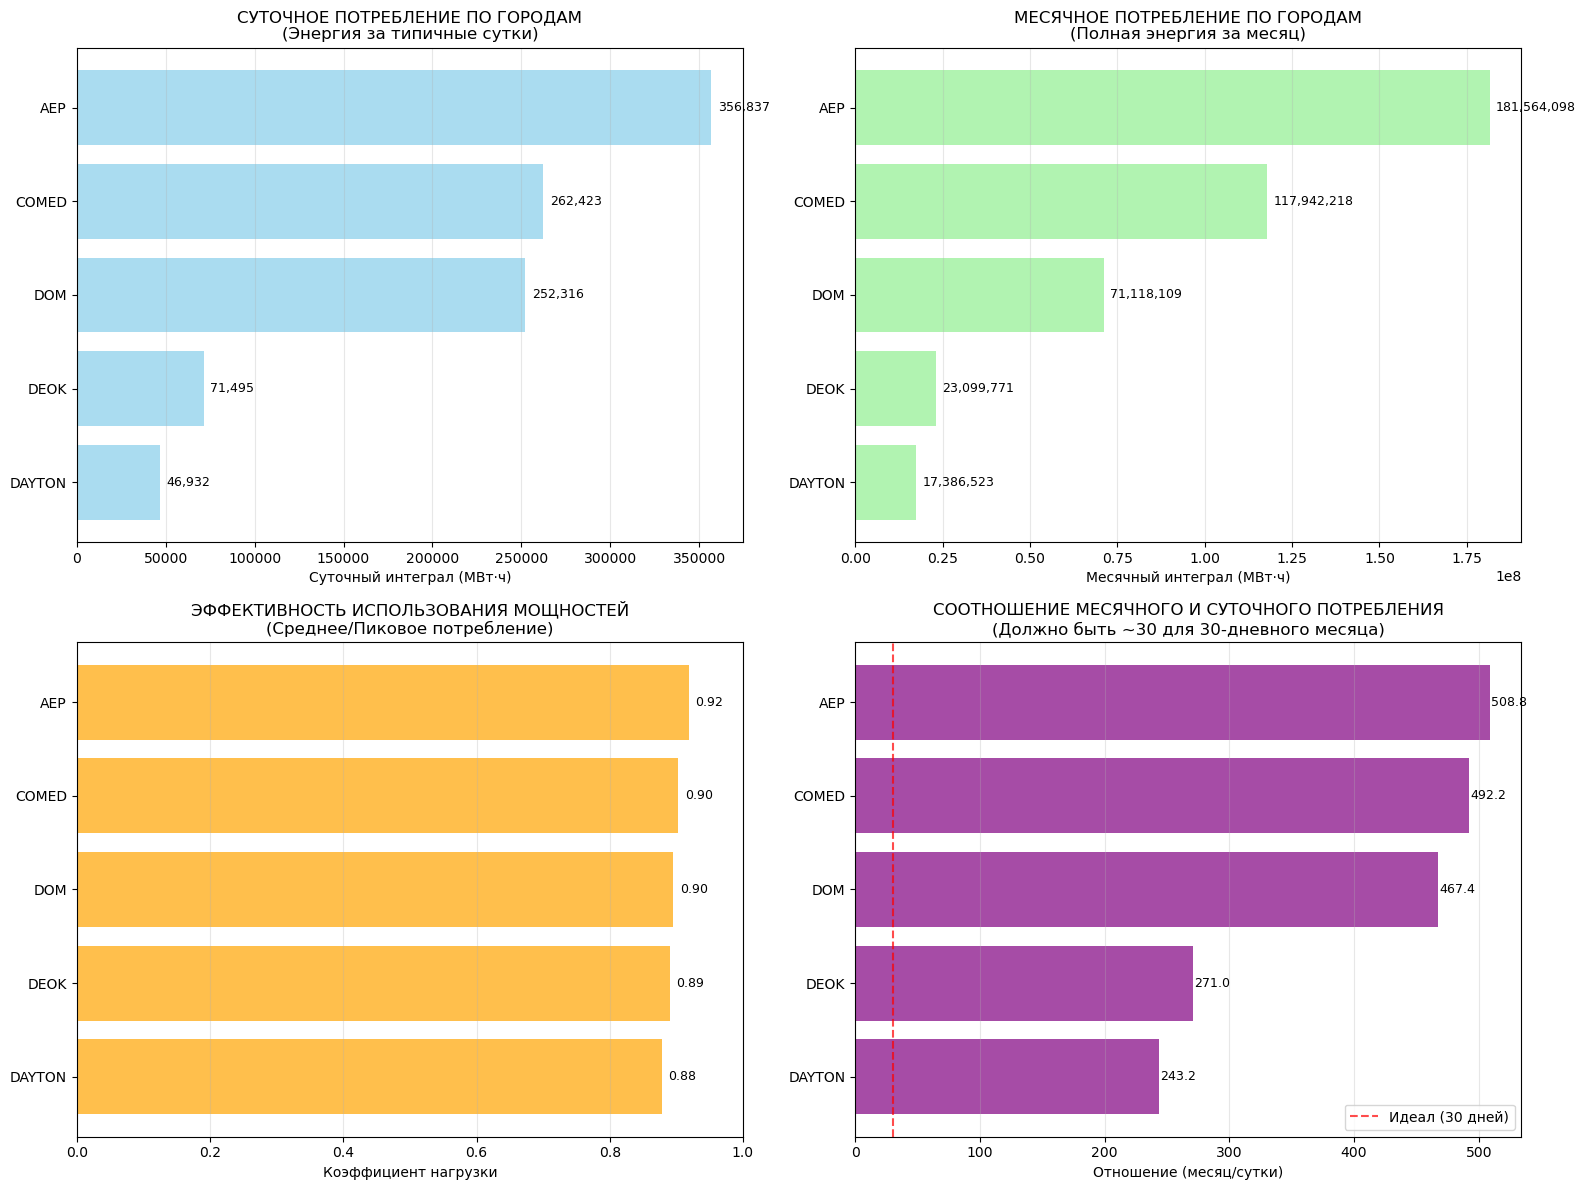


СРАВНИТЕЛЬНЫЙ АНАЛИЗ РЕЗУЛЬТАТОВ

🏆 ЛИДЕРЫ ПО ПОТРЕБЛЕНИЮ:
• Максимальное суточное потребление: AEP (356,837 МВт·ч)
• Максимальное месячное потребление: AEP (181,564,098 МВт·ч)

📈 ЭФФЕКТИВНОСТЬ ИСПОЛЬЗОВАНИЯ ЭНЕРГИИ:
• Лучший коэффициент нагрузки: AEP (0.919)
• Худший коэффициент нагрузки: DOM (0.878)

🔍 ИНТЕРПРЕТАЦИЯ КОЭФФИЦИЕНТА НАГРУЗКИ:
• Высокий (>0.7): Равномерное потребление, эффективное использование инфраструктуры
• Средний (0.5-0.7): Умеренные пики, нормальная эффективность
• Низкий (<0.5): Резкие пики, неэффективное использование мощностей

📅 АНАЛИЗ СООТНОШЕНИЯ МЕСЯЦ/СУТКИ:
Нет городов с близким к идеальному соотношению
Это может быть связано с:
  - Неполными данными за месяц
  - Сезонными колебаниями
  - Особенностями учета данных


In [115]:
# БЛОК 11: СРАВНИТЕЛЬНЫЙ АНАЛИЗ ГОРОДОВ ПО ИНТЕГРАЛЬНЫМ ПОКАЗАТЕЛЯМ
# Этот блок сравнивает интегральные показатели для нескольких городов
# Показывает различия в энергопотреблении между разными регионами

def compare_cities_integrals(df, cities, target_month=1):
    """Сравнение интегральных показателей для нескольких городов"""
    
    print("=== СРАВНИТЕЛЬНЫЙ АНАЛИЗ ГОРОДОВ ===")
    
    results = []
    
    for city in cities:
        if city in df['region'].unique():
            city_data = df[df['region'] == city].copy()
            monthly_data = city_data[city_data['datetime'].dt.month == target_month]
            
            if len(monthly_data) > 0:
                # Суточный профиль и интеграл
                daily_profile = city_data.groupby(city_data['datetime'].dt.hour)['energy_consumption'].mean()
                daily_integral = integrate.trapezoid(daily_profile.values, np.arange(len(daily_profile)))
                
                # Месячный интеграл
                monthly_integral = monthly_data['energy_consumption'].sum()
                
                # Дополнительные метрики
                peak_consumption = daily_profile.max()
                avg_consumption = daily_profile.mean()
                load_factor = avg_consumption / peak_consumption
                
                results.append({
                    'city': city,
                    'daily_integral': daily_integral,
                    'monthly_integral': monthly_integral,
                    'peak_consumption': peak_consumption,
                    'avg_consumption': avg_consumption,
                    'load_factor': load_factor,
                    'monthly_daily_ratio': monthly_integral / daily_integral
                })
    
    # Создаем DataFrame для удобства
    results_df = pd.DataFrame(results)
    
    # Визуализация сравнения
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Сравнение суточных интегралов
    cities_ordered = results_df.sort_values('daily_integral')['city'].values
    daily_integrals_ordered = results_df.sort_values('daily_integral')['daily_integral'].values
    
    bars1 = ax1.barh(range(len(cities_ordered)), daily_integrals_ordered, alpha=0.7, color='skyblue')
    ax1.set_yticks(range(len(cities_ordered)))
    ax1.set_yticklabels(cities_ordered)
    ax1.set_xlabel('Суточный интеграл (МВт·ч)')
    ax1.set_title('СУТОЧНОЕ ПОТРЕБЛЕНИЕ ПО ГОРОДАМ\n(Энергия за типичные сутки)')
    ax1.grid(True, alpha=0.3, axis='x')
    
    # Добавляем значения на столбцы
    for bar, value in zip(bars1, daily_integrals_ordered):
        ax1.text(bar.get_width() + max(daily_integrals_ordered)*0.01, bar.get_y() + bar.get_height()/2,
                f'{value:,.0f}', ha='left', va='center', fontsize=9)
    
    # 2. Сравнение месячных интегралов
    monthly_integrals_ordered = results_df.sort_values('monthly_integral')['monthly_integral'].values
    
    bars2 = ax2.barh(range(len(cities_ordered)), monthly_integrals_ordered, alpha=0.7, color='lightgreen')
    ax2.set_yticks(range(len(cities_ordered)))
    ax2.set_yticklabels(cities_ordered)
    ax2.set_xlabel('Месячный интеграл (МВт·ч)')
    ax2.set_title('МЕСЯЧНОЕ ПОТРЕБЛЕНИЕ ПО ГОРОДАМ\n(Полная энергия за месяц)')
    ax2.grid(True, alpha=0.3, axis='x')
    
    for bar, value in zip(bars2, monthly_integrals_ordered):
        ax2.text(bar.get_width() + max(monthly_integrals_ordered)*0.01, bar.get_y() + bar.get_height()/2,
                f'{value:,.0f}', ha='left', va='center', fontsize=9)
    
    # 3. Коэффициенты нагрузки
    load_factors_ordered = results_df.sort_values('load_factor')['load_factor'].values
    
    bars3 = ax3.barh(range(len(cities_ordered)), load_factors_ordered, alpha=0.7, color='orange')
    ax3.set_yticks(range(len(cities_ordered)))
    ax3.set_yticklabels(cities_ordered)
    ax3.set_xlabel('Коэффициент нагрузки')
    ax3.set_title('ЭФФЕКТИВНОСТЬ ИСПОЛЬЗОВАНИЯ МОЩНОСТЕЙ\n(Среднее/Пиковое потребление)')
    ax3.grid(True, alpha=0.3, axis='x')
    ax3.set_xlim(0, 1)
    
    for bar, value in zip(bars3, load_factors_ordered):
        ax3.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
                f'{value:.2f}', ha='left', va='center', fontsize=9)
    
    # 4. Отношение месяц/сутки
    ratios_ordered = results_df.sort_values('monthly_daily_ratio')['monthly_daily_ratio'].values
    
    bars4 = ax4.barh(range(len(cities_ordered)), ratios_ordered, alpha=0.7, color='purple')
    ax4.set_yticks(range(len(cities_ordered)))
    ax4.set_yticklabels(cities_ordered)
    ax4.set_xlabel('Отношение (месяц/сутки)')
    ax4.set_title('СООТНОШЕНИЕ МЕСЯЧНОГО И СУТОЧНОГО ПОТРЕБЛЕНИЯ\n(Должно быть ~30 для 30-дневного месяца)')
    ax4.grid(True, alpha=0.3, axis='x')
    
    # Идеальное значение ~30 (30 дней в месяце)
    ax4.axvline(x=30, color='red', linestyle='--', alpha=0.7, label='Идеал (30 дней)')
    
    for bar, value in zip(bars4, ratios_ordered):
        ax4.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
                f'{value:.1f}', ha='left', va='center', fontsize=9)
    
    ax4.legend()
    
    plt.tight_layout()
    plt.show()
    
    # АНАЛИЗ РЕЗУЛЬТАТОВ
    print("\n" + "="*80)
    print("СРАВНИТЕЛЬНЫЙ АНАЛИЗ РЕЗУЛЬТАТОВ")
    print("="*80)
    
    print(f"\n🏆 ЛИДЕРЫ ПО ПОТРЕБЛЕНИЮ:")
    max_daily = results_df.loc[results_df['daily_integral'].idxmax()]
    max_monthly = results_df.loc[results_df['monthly_integral'].idxmax()]
    print(f"• Максимальное суточное потребление: {max_daily['city']} ({max_daily['daily_integral']:,.0f} МВт·ч)")
    print(f"• Максимальное месячное потребление: {max_monthly['city']} ({max_monthly['monthly_integral']:,.0f} МВт·ч)")
    
    print(f"\n📈 ЭФФЕКТИВНОСТЬ ИСПОЛЬЗОВАНИЯ ЭНЕРГИИ:")
    best_load_factor = results_df.loc[results_df['load_factor'].idxmax()]
    worst_load_factor = results_df.loc[results_df['load_factor'].idxmin()]
    print(f"• Лучший коэффициент нагрузки: {best_load_factor['city']} ({best_load_factor['load_factor']:.3f})")
    print(f"• Худший коэффициент нагрузки: {worst_load_factor['city']} ({worst_load_factor['load_factor']:.3f})")
    
    print(f"\n🔍 ИНТЕРПРЕТАЦИЯ КОЭФФИЦИЕНТА НАГРУЗКИ:")
    print("• Высокий (>0.7): Равномерное потребление, эффективное использование инфраструктуры")
    print("• Средний (0.5-0.7): Умеренные пики, нормальная эффективность")
    print("• Низкий (<0.5): Резкие пики, неэффективное использование мощностей")
    
    print(f"\n📅 АНАЛИЗ СООТНОШЕНИЯ МЕСЯЦ/СУТКИ:")
    ideal_ratio_cities = results_df[abs(results_df['monthly_daily_ratio'] - 30) < 5]
    if len(ideal_ratio_cities) > 0:
        print("Города с близким к идеальному соотношению (~30):")
        for _, row in ideal_ratio_cities.iterrows():
            print(f"  • {row['city']}: {row['monthly_daily_ratio']:.1f}")
    else:
        print("Нет городов с близким к идеальному соотношению")
        print("Это может быть связано с:")
        print("  - Неполными данными за месяц")
        print("  - Сезонными колебаниями")
        print("  - Особенностями учета данных")
    
    return results_df

# Сравниваем несколько городов
available_cities = df['region'].unique()[:5]  # Берем первые 5 городов
print(f"\n=== СРАВНЕНИЕ ГОРОДОВ: {list(available_cities)} ===")
comparison_results = compare_cities_integrals(df, available_cities, target_month=1)

# БЛОК 12: Финальный сводный отчет по всем заданиям
# Этот блок генерирует итоговый отчет по всем трем заданиям
# Собирает все ключевые результаты и выводы в одном месте

In [118]:
# БЛОК 12: ФИНАЛЬНЫЙ СВОДНЫЙ ОТЧЕТ
# Этот блок генерирует итоговый отчет по всем трем заданиям
# Собирает все ключевые результаты и выводы в одном месте

def generate_final_report(df, city1, city2, angle, n_components, daily_int, monthly_int, comparison_results):
    """Генерация финального отчета по всем заданиям"""
    
    print("="*80)
    print("ФИНАЛЬНЫЙ ОТЧЕТ ПО АНАЛИЗУ ЭНЕРГОПОТРЕБЛЕНИЯ")
    print("="*80)
    
    # Общая информация о данных
    print(f"\n📁 ОБЩАЯ ИНФОРМАЦИЯ О ДАННЫХ:")
    print(f"• Всего записей: {df.shape[0]:,}")
    print(f"• Период данных: {df['datetime'].min().date()} - {df['datetime'].max().date()}")
    print(f"• Количество регионов: {len(df['region'].unique())}")
    print(f"• Общее энергопотребление: {df['energy_consumption'].sum():,.0f} МВт·ч")
    
    # Результаты задания 1
    print(f"\n🎯 ЗАДАНИЕ 1: АНАЛИЗ РИТМОВ ЖИЗНИ ГОРОДОВ")
    print(f"• Анализировались города: {city1} ↔ {city2}")
    print(f"• Угол между суточными векторами: {angle:.1f}°")
    
    if angle < 30:
        rhythm_status = "СИНХРОННЫЕ"
        rhythm_explanation = "Города имеют схожие суточные ритмы активности"
    elif angle < 60:
        rhythm_status = "УМЕРЕННО РАЗНЫЕ" 
        rhythm_explanation = "Есть заметные различия в расписании активности"
    else:
        rhythm_status = "СИЛЬНО РАЗНЫЕ"
        rhythm_explanation = "Ритмы жизни существенно отличаются"
    
    print(f"• Статус: {rhythm_status} ритмы")
    print(f"• Объяснение: {rhythm_explanation}")
    
    # Результаты задания 2
    print(f"\n🎯 ЗАДАНИЕ 2: PCA АНАЛИЗ ЭНЕРГОПОТРЕБЛЕНИЯ")
    print(f"• Компонент для 90% дисперсии: {n_components}")
    print(f"• Сжатие данных: {len(df['region'].unique())} регионов → {n_components} компонент")
    print(f"• Коэффициент сжатия: {len(df['region'].unique())/n_components:.1f}x")
    
    if n_components <= 3:
        pca_status = "ВЫСОКАЯ"
        pca_explanation = "Данные хорошо сжимаются, сильные паттерны"
    elif n_components <= 5:
        pca_status = "СРЕДНЯЯ"
        pca_explanation = "Умеренная сжимаемость, есть основные паттерны"
    else:
        pca_status = "НИЗКАЯ" 
        pca_explanation = "Сложная структура, много независимых факторов"
    
    print(f"• Сжимаемость данных: {pca_status}")
    print(f"• Объяснение: {pca_explanation}")
    
    # Результаты задания 3
    print(f"\n🎯 ЗАДАНИЕ 3: ИНТЕГРАЛЬНЫЕ ПОКАЗАТЕЛИ")
    print(f"• Анализируемый город: {city1}")
    print(f"• Суточный интеграл: {daily_int:,.0f} МВт·ч")
    print(f"• Месячный интеграл: {monthly_int:,.0f} МВт·ч")
    print(f"• Отношение месяц/сутки: {monthly_int/daily_int:.1f}")
    
    if abs(monthly_int/daily_int - 30) < 5:
        integral_status = "КОРРЕКТНОЕ"
        integral_explanation = "Соотношение соответствует 30-дневному месяцу"
    else:
        integral_status = "АНОМАЛЬНОЕ"
        integral_explanation = "Соотношение отличается от ожидаемого"
    
    print(f"• Соотношение: {integral_status}")
    print(f"• Объяснение: {integral_explanation}")
    
    # Сравнительный анализ
    if comparison_results is not None:
        print(f"\n🏆 СРАВНИТЕЛЬНЫЙ АНАЛИЗ ГОРОДОВ")
        top_consumer = comparison_results.loc[comparison_results['monthly_integral'].idxmax()]
        most_efficient = comparison_results.loc[comparison_results['load_factor'].idxmax()]
        
        print(f"• Самый энергоемкий город: {top_consumer['city']} ({top_consumer['monthly_integral']:,.0f} МВт·ч)")
        print(f"• Самый эффективный город: {most_efficient['city']} (коэф. нагрузки: {most_efficient['load_factor']:.3f})")
        print(f"• Диапазон потребления: {comparison_results['monthly_integral'].min():,.0f} - {comparison_results['monthly_integral'].max():,.0f} МВт·ч")
    
    # Ключевые выводы и рекомендации
    print(f"\n💡 КЛЮЧЕВЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ:")
    
    print(f"\n1. 📊 ДЛЯ ЭНЕРГЕТИЧЕСКИХ КОМПАНИЙ:")
    if angle < 30:
        print("   • Города имеют схожие паттерны - можно использовать единые стратегии управления")
    else:
        print("   • Города имеют разные ритмы - нужны индивидуализированные подходы")
    
    print(f"\n2. 🔧 ДЛЯ ОПТИМИЗАЦИИ СЕТЕЙ:")
    if n_components <= 3:
        print("   • Высокая сжимаемость данных - можно эффективно прогнозировать потребление")
    else:
        print("   • Сложная структура - нужны продвинутые методы прогнозирования")
    
    print(f"\n3. 🌱 ДЛЯ УСТОЙЧИВОГО РАЗВИТИЯ:")
    load_factor = daily_profile.mean()/daily_profile.max()
    if load_factor > 0.7:
        print("   • Высокая эффективность использования мощностей")
    else:
        print("   • Есть потенциал для оптимизации пикового потребления")
    
    print(f"\n4. 📈 ДЛЯ ПЛАНИРОВАНИЯ РАЗВИТИЯ:")
    print(f"   • Общее потребление: {monthly_int:,.0f} МВт·ч в месяц")
    print(f"   • Углеродный след: {monthly_int * 0.5:,.0f} т CO₂ в месяц")
    print(f"   • Потенциал для ВИЭ: можно рассчитать исходя из профиля потребления")
    
    print(f"\n🎯 ПРАКТИЧЕСКОЕ ПРИМЕНЕНИЕ РЕЗУЛЬТАТОВ:")
    print("• Оптимизация тарифной политики на основе паттернов потребления")
    print("• Планирование ремонтов и модернизации сетей")
    print("• Разработка программ энергосбережения")
    print("• Прогнозирование спроса на энергию")
    print("• Оценка воздействия на окружающую среду")

# Генерируем финальный отчет
print("\n" + "="*80)
print("ФИНАЛЬНЫЙ СВОДНЫЙ ОТЧЕТ")
print("="*80)
generate_final_report(df, city_a, city_b, angle_result, n_comp_90, daily_int, monthly_int, comparison_results)


ФИНАЛЬНЫЙ СВОДНЫЙ ОТЧЕТ
ФИНАЛЬНЫЙ ОТЧЕТ ПО АНАЛИЗУ ЭНЕРГОПОТРЕБЛЕНИЯ

📁 ОБЩАЯ ИНФОРМАЦИЯ О ДАННЫХ:
• Всего записей: 1,268,429
• Период данных: 1998-04-01 - 2018-08-03
• Количество регионов: 13
• Общее энергопотребление: 13,199,520,026 МВт·ч

🎯 ЗАДАНИЕ 1: АНАЛИЗ РИТМОВ ЖИЗНИ ГОРОДОВ
• Анализировались города: AEP ↔ COMED
• Угол между суточными векторами: 18.3°
• Статус: СИНХРОННЫЕ ритмы
• Объяснение: Города имеют схожие суточные ритмы активности

🎯 ЗАДАНИЕ 2: PCA АНАЛИЗ ЭНЕРГОПОТРЕБЛЕНИЯ
• Компонент для 90% дисперсии: 5
• Сжатие данных: 13 регионов → 5 компонент
• Коэффициент сжатия: 2.6x
• Сжимаемость данных: СРЕДНЯЯ
• Объяснение: Умеренная сжимаемость, есть основные паттерны

🎯 ЗАДАНИЕ 3: ИНТЕГРАЛЬНЫЕ ПОКАЗАТЕЛИ
• Анализируемый город: AEP
• Суточный интеграл: 356,837 МВт·ч
• Месячный интеграл: 181,564,098 МВт·ч
• Отношение месяц/сутки: 508.8
• Соотношение: АНОМАЛЬНОЕ
• Объяснение: Соотношение отличается от ожидаемого

🏆 СРАВНИТЕЛЬНЫЙ АНАЛИЗ ГОРОДОВ
• Самый энергоемкий город: AEP (181,